# Stroop Effect

## What is Stroop Effect?

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Independent and Dependent variables

For each word, there are two characteristics: WHAT the word is, and WHAT COLOR the word is.

For our purposes a single independent variable could be defined: Whether these characteristics are *congruent* for the list of words, or not. In other words, *congruence* of words.

Our dependent variable is the time it takes for a participant to read all the words in the list.

## Hypotheses and Statistical Test

Our null hypothesis is that means of the incongruent and congruent populations (of reading times) are not statistically different. Alternative hypothesis is that they are statistically different.

$H_0: \mu_i = \mu_c$

$H_1: \mu_i \neq \mu_c$ 

where

$\mu_i$ is population mean for times in incongruent case and

$\mu_c$ is population mean for times in congruent case.

We'll choose a paired one-tailed t-test, with 95% confidence interval.

***Why t-test?*** - We choose a t-test over Z-test, as we don't know the population standard deviation and our sample size is smaller than 30.

***Why a paired test?*** - As same subjects are tested twice (one in each sample), we know we can pair the observations of two samples.

***Why one tailed?*** - We can assume that having the word colored different than its meaning is always detrimental to reading speed, and not otherwise.

***Why 95% CI?*** - We could have chosen 90% or 99% too, this is simply a choice as we don't have any regulations etc. to guide us.

## Other Assumptions

When we decide to use t-test for this study, there are several assumptions:

* Dependent variable is continuous (It is time)
* Sample is representative of and randomly selected from total population
* Data exhibits normal behavior when plotted
* Sample size large enough to show normal behavior
* Homogeneity of variance (standard deviations of samples are approximately equal)

## My Results

Congruent task: 09.06 seconds

Incongruent task: 14.75 seconds

## Dataset

In [140]:
# importing all necessary packages

import csv
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

# kernel option to see value of multiple statements

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# reading data

stroop = pd.read_csv("stroopdata.csv")

In [141]:
# confirming data is read

stroop.head(3)
stroop.tail(3)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214


,Congruent,Incongruent
21,14.233,17.960
22,19.710,22.058
23,16.004,21.157


In [142]:
# summary of dataset

stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Some quick observations:

* We have 24 observations for congruent and incongruent words each.
* Mean is 14.05 for congruent and 22.02 for incongruent.
* Median (2nd quartile) is 14.36 for congruent and 21.02 for incongruent.

In all quartiles and min/max values, incongruent values are higher.

## Visualizations

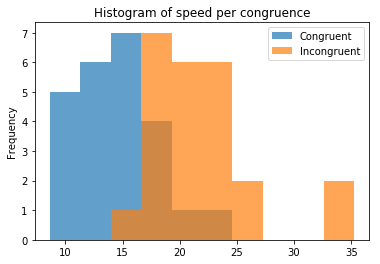

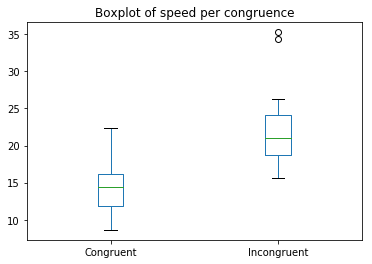

In [143]:
# histogram

stroop.plot.hist(title="Histogram of speed per congruence", alpha = 0.7, bins=10)

# boxplot

stroop.plot.box(title="Boxplot of speed per congruence")

In our histogram, we see that congruent and incongruent observations are mostly separated, and incongruent observations are mostly higher.

In our boxplot we see similar results, we also see there are two possible outliers in incongruent observations.

## Hypothesis Testing Using t-test

These are the steps that we will follow to perform one-tailed, paired t-test with 95% CI:

* Calculating the difference for each observation pair
* Calculating mean difference
* Calcuating standard deviation of differences
* Calculating standard error for the mean difference
* Calculate t-statistic
* Compare t-statistic of null hypothesis using t-distribution tables
* Calculate p-value and decide to reject/fail to reject null hypothesis (using 95% CI)

In [144]:
# adding difference column to stroop dataframe

stroop_new['Difference'] = stroop['Incongruent'] - stroop['Congruent']
stroop_new.head(3)

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650


$d_i = i_i - c_i$ 

In [145]:
# calculating mean and standard deviation of differences

mean_diff = stroop_new['Difference'].mean()
std_diff = stroop_new['Difference'].std()

$\bar{d} = 7.965$

$\sigma_d = 4.865$

In [146]:
# calculating standard error of mean

se_mean = std_diff / len(stroop_new)**(0.5)

$SE(\bar{d}) = \frac{\sigma_d}{\sqrt{n}} = 0.993$

In [147]:
# calculating t-statistic

t_stat = mean_diff / se_mean

$T = \frac{\bar{d}}{SE(\bar{d})} = 8.021$

with 23 degree of freedom.

Using t-table, our p value is smaller than 0.00001. The probability is smaller than p value of 0.05 (95% confidence interval, one-tailed). Thus we can conclude this result is significant.

## Conclusion

We decide to *reject* the null hypothesis, and decide that **incongruent words cause reading times to be higher**.

This result is in accordance with our expectations before we start the study.

If we take a guess at why this phenomena happens, we can suggest that brain processes colors faster than it reads and processes words, thus causing us to be slower voicing the words.

Another guess is that brain does more work when the words are incongruent, i.e. reading the word AND processing the color vs. only reading the word.

One example coming to mind is "head bobble". This gesture can sometimes be used as encouragement or acknowledgement in India, in contrast with most Western countries. A task could be created that the subject converses with an experimenter, who uses head gestures in a way subject is not accustomed to (incongruent). Compared to subjects being given congruent head gestures, their response time to in conversations are likely to be slower.

Another example could be reversing the movements of the cursor depending on the mouse movements: cursor goes left when mouse goes right etc. It could take much longer to accomplish even simpler tasks.

## References

https://www.udacity.com<br>
https://en.wikipedia.org/wiki/Stroop_effect<br>
https://www.linkedin.com/pulse/z-test-vs-t-test-arunmozhi-ilango<br>
http://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp<br>
http://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf<br>
https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php<br>
http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf<br>
http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/<br>
https://en.wikipedia.org/wiki/Head_bobble<br>